In [48]:
# Understanding the variables
# simulation dependent
#S0 = 100.0             # asset price
#T = 1.0                # time in years
#r = 0.02               # risk-free rate
#N = 252                # number of time steps in simulation
#M = 1000               # number of simulations

# Heston dependent parameters
#kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
#theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
#v0 = 0.25**2           # initial variance under risk-neutral dynamics
#rho = 0.7              # correlation between returns and variances under risk-neutral dynamics
#sigma = 0.6            # volatility of volatility

Text(0.5, 1.0, 'Correlated Random Variables')

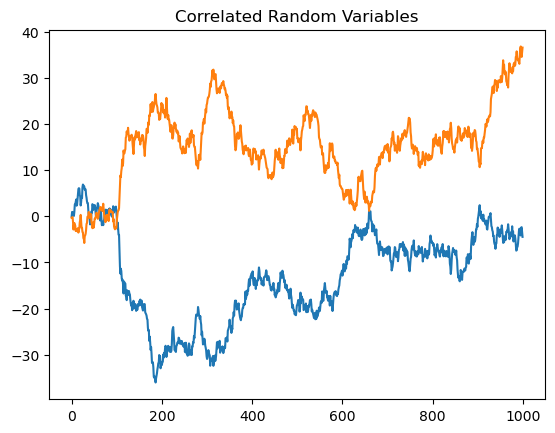

In [50]:
## Generating correlated random variables
import numpy as np
import matplotlib.pyplot as plt

rho = -0.7
Ndraws = 1000
mu = np.array([0,0])
cov = np.array([[1, rho] , [rho , 1]])

W = np.random.multivariate_normal(mu, cov, size=Ndraws)

plt.plot(W.cumsum(axis=0));
plt.title('Correlated Random Variables')

In [52]:
np.corrcoef(W.T)

array([[ 1.        , -0.67236248],
       [-0.67236248,  1.        ]])

In [54]:
## Simulating a heston process
def generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, 
                          steps, Npaths, return_vol=False):
    dt = T/steps
    size = (Npaths, steps)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S
    v_t = v_0
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0,0]), 
                                           cov = np.array([[1,rho],
                                                          [rho,1]]), 
                                           size=Npaths) * np.sqrt(dt) 
        
        S_t = S_t*(np.exp( (r- 0.5*v_t)*dt+ np.sqrt(v_t) *WT[:,0] ) ) 
        v_t = np.abs(v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:,1])
        prices[:, t] = S_t
        sigs[:, t] = v_t
    
    if return_vol:
        return prices, sigs
    
    return prices

In [56]:
paths = generate_heston_paths(24500,0.25,0.07,2.5,0.04,0.035,-0.65,0.45,252,10000)

In [58]:
paths

array([[24469.90143136, 24484.33613565, 24709.34672635, ...,
        24503.84285797, 24120.41431792, 24010.46853839],
       [24617.30417647, 24557.44835115, 24654.00282178, ...,
        24520.34808731, 24593.11100632, 24555.4811725 ],
       [24360.7525245 , 24370.19357749, 23978.82491378, ...,
        26963.13570268, 26955.21743811, 26988.947213  ],
       ...,
       [24724.60721868, 24836.60533643, 24921.3712245 , ...,
        28431.98301988, 28355.2856424 , 28386.5477483 ],
       [24379.55555293, 24556.63534897, 24577.71589319, ...,
        24017.72252735, 23954.75830254, 24028.70448216],
       [24192.25386638, 24225.89032161, 24458.76716445, ...,
        28027.90245897, 27960.67323496, 27799.02535581]])

In [60]:
print(f"Path shape: {paths.shape}")
print(f"Final prices mean: {np.mean(paths[:, -1]):.2f}")
print(f"Final prices std:  {np.std(paths[:, -1]):.2f}")
print(f"Min price: {np.min(paths[:, -1]):.2f}")
print(f"Max price: {np.max(paths[:, -1]):.2f}")

Path shape: (10000, 252)
Final prices mean: 24959.29
Final prices std:  2299.91
Min price: 13653.04
Max price: 33002.27


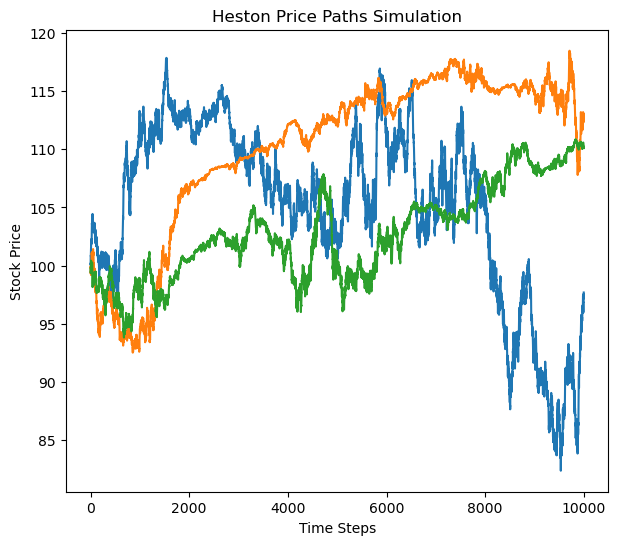

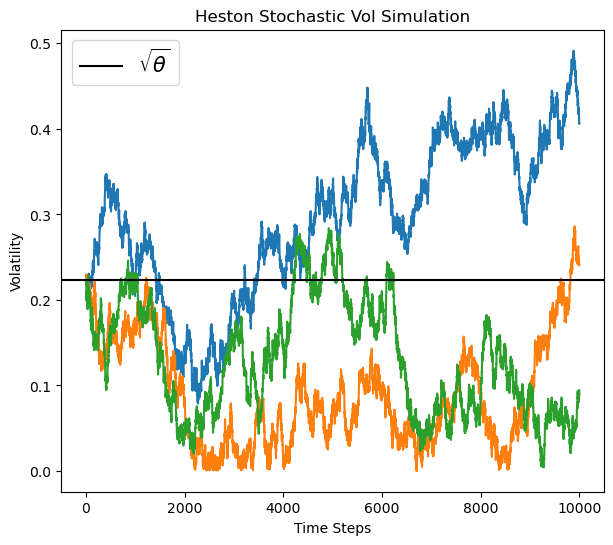

In [96]:
# Simulating heston process with respect to time steps
kappa =2
theta = 0.05
v_0 =  0.05
xi = 0.6
r = 0.05
S = 100
paths =3
steps = 10000
T = 1
rho = -0.5
prices,sigs = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho, xi, steps, paths,
                                    return_vol=True)        

plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigs).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()

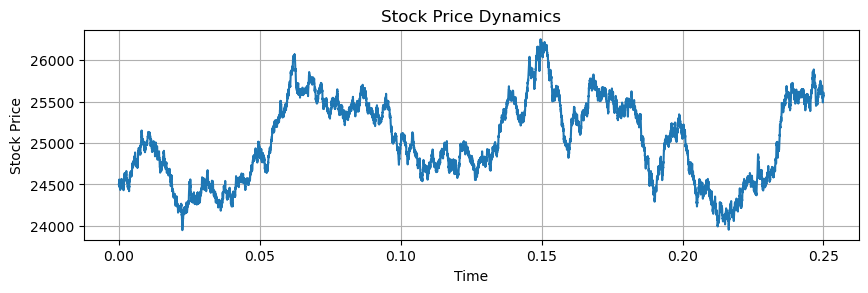

In [70]:
## Option Pricing using Heston Model
import numpy as np
import matplotlib.pyplot as plt

# Parameters of both equations
T = 0.25 # Total time
N = 10000 # Number of time steps
dt = T / N # Time step size
t = np.linspace(0.0, T, N+1) # Time vector
mu = 0.1 # Expected return
v0 = 0.035 # Initial volatility
kappa = 2.5 # Mean reversion rate
theta = 0.04 # Long-term average volatility
sigma = 0.1 # Volatility

# Generate random shocks - random fluctuations
dW1 = np.random.randn(N) * np.sqrt(dt)
dW2 = np.random.randn(N) * np.sqrt(dt)

# Initialize arrays for stock price and volatility
S = np.zeros(N+1)
v = np.zeros(N+1)
S[0] = 24500.0 # Initial stock price
v[0] = v0 # Initial volatility

# Euler-Maruyama method to solve the stochastic differential equation for stock price dynamics
for i in range(1, N+1):
    v[i] = v[i-1] + kappa * (theta - v[i-1]) * dt + sigma * np.sqrt(v[i-1]) * dW2[i-1]
    S[i] = S[i-1] * (1 + mu * dt + np.sqrt(v[i-1]) * dW1[i-1])

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, S)
plt.title('Stock Price Dynamics')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)

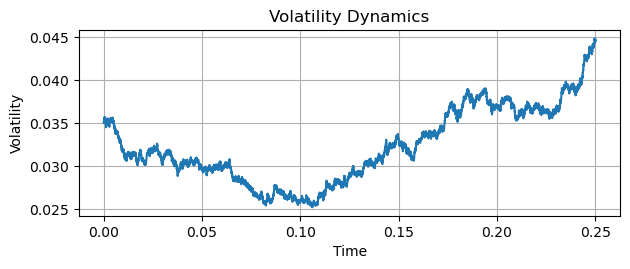

In [72]:
plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.title('Volatility Dynamics')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

In [170]:
# Model parameters
S0 = 100.0    # Initial stock price
K = 100.0     # Strike price
r = 0.05      # Risk-free rate
T = 1.0       # Time to maturity
kappa = 2.0   # Mean reversion rate
theta = 0.05  # Long-term average volatility
sigma = 0.3   # Volatility of volatility
rho = -0.5    # Correlation coefficient
v0 = 0.05     # Initial volatility

In [172]:
# Define characteristic functions
def heston_characteristic_function(u, S0, K, r, T, kappa, theta, sigma, rho, v0):
   xi = kappa - rho * sigma * 1j * u
   d = np.sqrt((rho * sigma * 1j * u - xi)**2 - sigma**2 * (-u * 1j - u**2))
   g = (xi - rho * sigma * 1j * u - d) / (xi - rho * sigma * 1j * u + d)
   C = r * 1j * u * T + (kappa * theta) / sigma**2 * ((xi - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
   D = (xi - rho * sigma * 1j * u - d) / sigma**2 * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
   return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Define functions to compute call and put options prices
def heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) * 0.5 * S0 - np.exp(-r * T) / np.pi * integral


def heston_put_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) / np.pi * integral - S0 + K * np.exp(-r * T)

In [174]:
# Calculate call and put option prices
call_price = heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0)
put_price = heston_put_price(S0, K, r, T, kappa, theta, sigma, rho, v0)


print("Heston Call Option Price:", np.round(call_price, 2))
print("Heston Put Option Price:", np.round(put_price, 2))

Heston Call Option Price: 27.63
Heston Put Option Price: 15.06


In [114]:
from scipy.stats import norm
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes price for a European call option.
    
    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of underlying asset
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate Black-Scholes price for a European put option.
    
    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of underlying asset
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

In [116]:
S, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

print(f" BlackScholes Call option price: {call_price:.4f}")
print(f" BlackScholes Put option price: {put_price:.4f}")

 BlackScholes Call option price: 10.4506
 BlackScholes Put option price: 5.5735


In [118]:
## Generating volatility skew and smile and simulating 1 yr prices using both models
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Model parameters
S0 = 100.0    # Initial stock price
r = 0.05      # Risk-free rate
T = 1.0       # Time to maturity (years)
kappa = 2.0   # Mean reversion rate
theta = 0.05  # Long-term variance (volatility^2)
sigma = 0.3   # Volatility of volatility
rho = -0.5    # Correlation coefficient
v0 = 0.05     # Initial variance
Nsteps = 252  # Daily steps
Npaths = 1    # Simulate one path each for price comparison

dt = T / Nsteps
mean = [0, 0]
cov = [[1, rho], [rho, 1]]

In [122]:
# Simulate 1 path of Heston stochastic volatility model
def simulate_heston_path(S0, T, r, kappa, theta, sigma, rho, v0, steps):
    St = np.zeros(steps+1)
    vt = np.zeros(steps+1)
    St[0] = S0
    vt[0] = v0
    for t in range(steps):
        dW = np.random.multivariate_normal(mean, cov) * np.sqrt(dt)
        vt[t+1] = np.abs(vt[t] + kappa * (theta - vt[t]) * dt + sigma * np.sqrt(max(vt[t],0)) * dW[1])
        St[t+1] = St[t] * np.exp((r - 0.5 * vt[t]) * dt + np.sqrt(max(vt[t],0)) * dW[0])
    return St

# Simulate 1 path under Black-Scholes with constant volatility sqrt(theta)
def simulate_bs_path(S0, T, r, sigma, steps):
    St = np.zeros(steps+1)
    St[0] = S0
    dt = T / steps
    for t in range(steps):
        z = np.random.normal()
        St[t+1] = St[t] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return St

# Heston model characteristic function for pricing
def heston_characteristic_function(u, S0, K, r, T, kappa, theta, sigma, rho, v0):
    xi = kappa - sigma * rho * 1j * u
    d = np.sqrt((sigma * rho * 1j * u - xi)**2 + sigma**2 * (1j*u + u**2))
    g = (xi - d) / (xi + d)
    C = r * 1j * u * T + kappa * theta / sigma**2 * ((xi - d) * T - 2 * np.log((1 - g*np.exp(-d*T)) / (1 - g)))
    D = (xi - d)/sigma**2 * ((1 - np.exp(-d*T)) / (1 - g * np.exp(-d*T)))
    return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Heston call price via Fourier inversion
def heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
    def integrand(u):
        cf1 = heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0)
        cf2 = heston_characteristic_function(-1j, S0, K, r, T, kappa, theta, sigma, rho, v0)
        return np.real(np.exp(-1j * u * np.log(K)) * cf1 / (1j * u * cf2))
    integral = quad(integrand, 1e-6, 100, limit=100)[0]
    return S0 - np.exp(-r * T) * np.sqrt(K) * integral / np.pi

# Black-Scholes call price
def bs_call_price(S, K, T, r, sigma):
    if sigma <= 0: return max(S - K * np.exp(-r*T), 0)
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# Black-Scholes implied volatility solver
def implied_volatility(market_price, S, K, T, r):
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price
    try:
        return brentq(objective, 1e-6, 5.0)
    except:
        return np.nan

# Generate strikes for implied vol smile
strike_range = np.linspace(0.7*S0, 1.3*S0, 21)

In [124]:
market_prices = np.array([heston_call_price(S0, K_, r, T, kappa, theta, sigma, rho, v0) for K_ in strike_range])

In [126]:
market_prices

array([ 96.71455694,  96.89212905,  97.14134943,  97.47094869,
        97.88766415,  98.39498967,  98.99179654,  99.67096415,
       100.41799454, 101.21016577, 102.01622837, 102.79769685,
       103.51196263, 104.11854846, 104.58789468, 104.91162766,
       105.10877692, 105.22133421, 105.29550113, 105.35987926,
       105.42285641])

In [128]:
implied_vols = np.array([implied_volatility(p, S0, K_, T, r) for p, K_ in zip(market_prices, strike_range)])

In [130]:
implied_vols

array([4.09902126, 4.1626461 , 4.24738066, 4.36093907, 4.51600092,
       4.73686091,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])

In [134]:
# Simulate daily price paths
np.random.seed(42)
heston_path = simulate_heston_path(S0, T, r, kappa, theta, sigma, rho, v0, Nsteps)
bs_path = simulate_bs_path(S0, T, r, np.sqrt(theta), Nsteps)

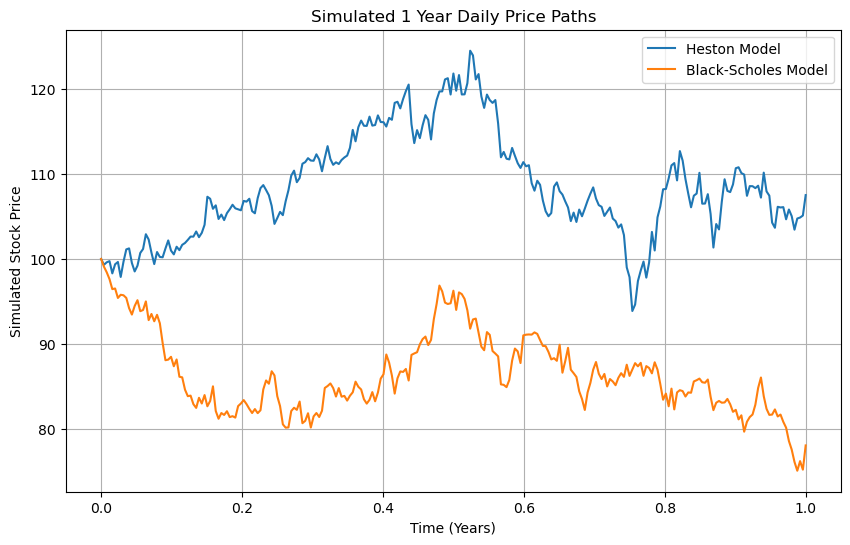

In [138]:
# Plot simulated price paths for both models
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0, T, Nsteps+1), heston_path, label='Heston Model')
plt.plot(np.linspace(0, T, Nsteps+1), bs_path, label='Black-Scholes Model')
plt.xlabel('Time (Years)')
plt.ylabel('Simulated Stock Price')
plt.title('Simulated 1 Year Daily Price Paths')
plt.legend()
plt.grid(True)
plt.show()

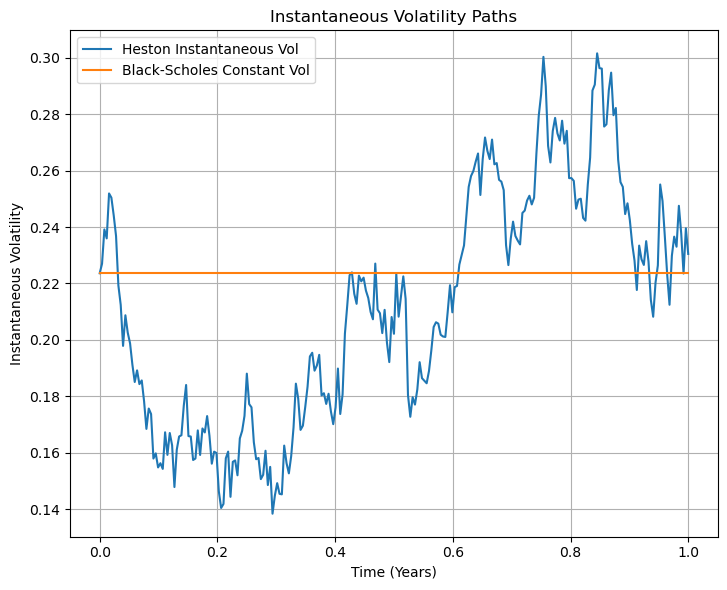

In [166]:
# Simulate Heston path with instantaneous volatility:
def simulate_heston_path_with_vol(S0, T, r, kappa, theta, sigma, rho, v0, steps):
    St = np.zeros(steps+1)
    vol = np.zeros(steps+1)  # instantaneous volatility
    vt = np.zeros(steps+1)   # variance
    St[0] = S0
    vt[0] = v0
    vol[0] = np.sqrt(v0)
    for t in range(steps):
        dW = np.random.multivariate_normal(mean, cov) * np.sqrt(dt)
        vt[t+1] = np.abs(vt[t] + kappa * (theta - vt[t]) * dt + sigma * np.sqrt(max(vt[t],0)) * dW[1])
        vol[t+1] = np.sqrt(vt[t+1])
        St[t+1] = St[t] * np.exp((r - 0.5 * vt[t]) * dt + np.sqrt(max(vt[t],0)) * dW[0])
    return St, vol

# Simulate Black-Scholes path with constant volatility:
def simulate_bs_path_with_vol(S0, T, r, sigma, steps):
    St = np.zeros(steps+1)
    vol = np.full(steps+1, sigma)  # constant volatility
    St[0] = S0
    dt = T / steps
    for t in range(steps):
        z = np.random.normal()
        St[t+1] = St[t] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return St, vol

# Usage:
np.random.seed(42)
heston_prices, heston_vols = simulate_heston_path_with_vol(S0, T, r, kappa, theta, sigma, rho, v0, Nsteps)
bs_prices, bs_vols = simulate_bs_path_with_vol(S0, T, r, np.sqrt(theta), Nsteps)

# You can then plot price and instantaneous volatility paths:

import matplotlib.pyplot as plt

time_grid = np.linspace(0, T, Nsteps+1)

plt.figure(figsize=(14,6))


plt.subplot(1,2,2)
plt.plot(time_grid, heston_vols, label='Heston Instantaneous Vol')
plt.plot(time_grid, bs_vols, label='Black-Scholes Constant Vol')
plt.xlabel('Time (Years)')
plt.ylabel('Instantaneous Volatility')
plt.title('Instantaneous Volatility Paths')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
